<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/Ufairah_Damara_Bashir_H071201091_week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### klasifikasi dan regresi

In [ ]:
X, y = make_classification(n_samples=2000, n_classes=3, n_features=10, n_informative=3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
y_pred_proba_positive = pred_prob[:,1]
y_true = y_test

In [ ]:
from sklearn.metrics import accuracy_score
CA=accuracy_score(y_true, pred)
NCCS=accuracy_score(y_true, pred, normalize=False)

## 1. Akurasi

adalah rasio prediksi benar (positif dan negatif) dengan keseluruhan data.

In [ ]:
CA

0.6575

In [ ]:
NCCS

526

## 2. precision, recall, F1-score

Precision adalah rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf.

Recall adalah rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif

F1 Score adalah perbandingan rata-rata presisi dan recall yang dibobotkan

In [ ]:
labels = ["label_3","label_4","label_5"]

In [ ]:
print(classification_report(y_true, pred, target_names=labels))

              precision    recall  f1-score   support

     label_3       0.62      0.70      0.66       276
     label_4       0.58      0.40      0.47       264
     label_5       0.74      0.87      0.80       260

    accuracy                           0.66       800
   macro avg       0.65      0.66      0.64       800
weighted avg       0.65      0.66      0.64       800



## 3. Confusion Matrix

Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih. Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, y_true)
cm

array([[194, 103,  16],
       [ 60, 105,  17],
       [ 22,  56, 227]])

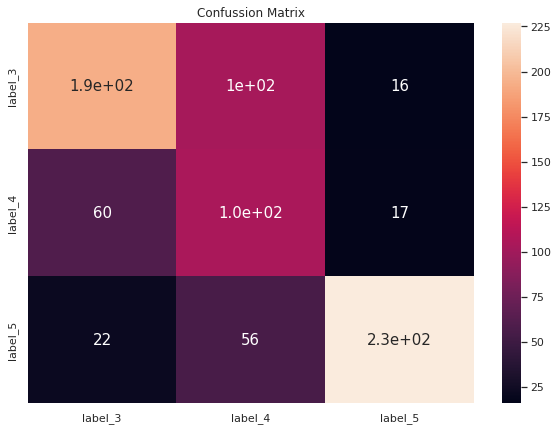

In [ ]:
  import seaborn as sns

  #Visualisasi Confussion Matrix
  model_df_cm = pd.DataFrame(cm, labels, labels)
  plt.figure(figsize = (10,7))
  plt.title('Confussion Matrix')
  sns.set(font_scale=1) #for label size
  sns.heatmap(model_df_cm, annot=True, annot_kws={"size": 15}) # font size
  plt.show()

## 4. ROC-Curve

ROC adalah representasi grafis dari hubungan antara sensitivitas dan 1-spesifisitas. Dalam penelitian medis kurva ROC banyak digunakan untuk menggambarkan keakuratan diagnostik dan menentukan nilai cut-off yang optimal

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

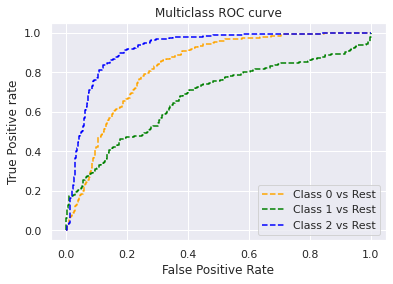

In [ ]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

## 5. REGREMASI ESTIIMASI

Model regresi linier merupakan model yang paling sering digunakan dalam analisis statistika. Model regresi linier ini digunakan untuk menyatakan hubungan fungsional antara satu atau beberapa variabel bebas (prediktor) terhadap satu variabel terikat (respon). Dalam analisis regresi, mengestimasi parameter secara otomatis mengestimasi model regresi. Untuk memperoleh estimasi model regresi dapat dilakukan dengan beberapa metode antara lain: metode kuadrat terkecil, metode maksimum likelihood dan sebagainya.

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
data_1 = pd.DataFrame([[1, 9], [2, 4], [5, 8], [9, 10], [3, 5], [1, 6], [9, 2], [4, 2]])
data_1.columns = ['Kamera(x)', 'Harga(y)']
data_1

,Kamera(x),Harga(y)
0,1,9
1,2,4
2,5,8
3,9,10
4,3,5
5,1,6
6,9,2
7,4,2


In [ ]:
X = data_1["Kamera(x)"].values[:, np.newaxis]
y = data_1["Harga(y)"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.683673469387755


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 5.084756351520199


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2.2549404319228032


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-1.2598917117867554


In [ ]:
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

-1.3820480205319856


## 6. CLUSTERING

Clustering adalah proses partisi satu set objek data ke dalam himpunan bagian yang disebut dengan cluster. Objek yang di dalam cluster memiliki kemiripan karakteristik antar satu sama lainnya dan berbeda dengan cluster yang lain.

In [ ]:
!unzip -q/content/drive/MyDrive/WORK/PERKULIAHAN/semester3/5PROGRAM/DATASET/disease.zip

error:  -fn or any combination of -c, -l, -p, -t, -u and -v options invalid
caution:  both -n and -o specified; ignoring -o
UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make dir

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WORK/PERKULIAHAN/semester3/5PROGRAM/DATASET/disease.zip")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.drop(['ca'], axis=1, inplace=True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,2,1


In [ ]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['age', 'trestbps']]

scaler = StandardScaler()


df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(303, 2)

In [ ]:
data = pd.DataFrame(df_scale)
data.columns = ['age', 'trestbps']

data_cluster = data.copy()
data.head()

,age,trestbps
0,0.952197,0.763956
1,-1.915313,-0.092738
2,-1.474158,-0.092738
3,0.180175,-0.663867
4,0.290464,-0.663867


In [ ]:
data.describe()

,age,trestbps
count,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16
std,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00
25%,-7.572802e-01,-6.638668e-01
50%,6.988599e-02,-9.273778e-02
75%,7.316189e-01,4.783913e-01
max,2.496240e+00,3.905165e+00


In [ ]:
 data = df.copy()
 data_cluster = df.copy()

## 7. Elbow Method

Elbow method adalah metoda yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering.

Tujuannya adalah menghitung WCSS se-minimum dengan jumlah cluster yang kecil agar bisa dilakukan interpretasi data.

Text(0, 0.5, 'Inertia')

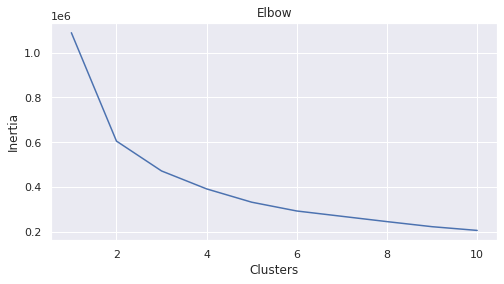

In [ ]:
from sklearn.cluster import KMeans

# buat list inertia
clusters = []
for i in range (1,11):
   km = KMeans(n_clusters=i).fit(data)
   clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
df_scale[:5]

array([[ 0.9521966 ,  0.76395577],
       [-1.91531289, -0.09273778],
       [-1.47415758, -0.09273778],
       [ 0.18017482, -0.66386682],
       [ 0.29046364, -0.66386682]])

In [ ]:
data = pd.DataFrame(df_scale)
data.columns = ['age', 'trestbps']

data_cluster = data.copy()
data.head()

,age,trestbps
0,0.952197,0.763956
1,-1.915313,-0.092738
2,-1.474158,-0.092738
3,0.180175,-0.663867
4,0.290464,-0.663867


In [ ]:
data.describe()

,age,trestbps
count,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16
std,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00
25%,-7.572802e-01,-6.638668e-01
50%,6.988599e-02,-9.273778e-02
75%,7.316189e-01,4.783913e-01
max,2.496240e+00,3.905165e+00


In [ ]:
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)


model_kmeans3.fit(data)
model_kmeans4.fit(data)


data_cluster['cluster_kmeans3'] = model_kmeans3.labels_
data_cluster['cluster_kmeans4'] = model_kmeans4.labels_

data_cluster

,age,trestbps,cluster_kmeans3,cluster_kmeans4
0,0.952197,0.763956,0,3
1,-1.915313,-0.092738,2,2
2,-1.474158,-0.092738,2,2
3,0.180175,-0.663867,1,1
4,0.290464,-0.663867,1,1
...,...,...,...,...
298,0.290464,0.478391,0,1
299,-1.033002,-1.234996,2,0
300,1.503641,0.706843,0,3
301,0.290464,-0.092738,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


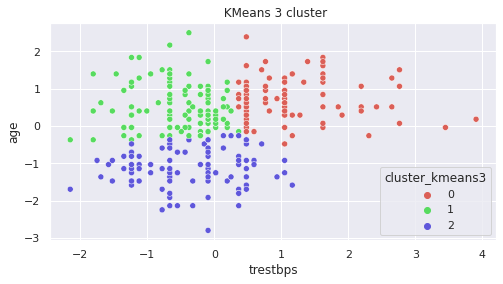

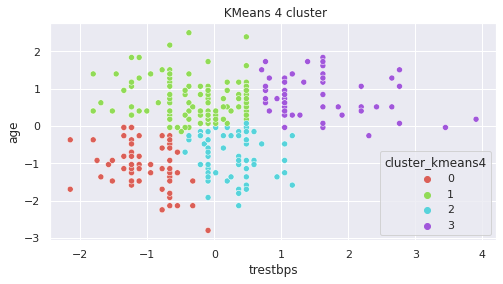

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['trestbps'], data_cluster['age'], hue=data_cluster['cluster_kmeans3'], palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['trestbps'], data_cluster['age'], hue=data_cluster['cluster_kmeans4'], palette=sns.color_palette('hls',4))
plt.title(' KMeans 4 cluster')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 5):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(X)
    score = silhouette_score(X, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.7380952380952381
Silhouette Score for k =  3 is 0.6853219696969697
Silhouette Score for k =  4 is 0.6583333333333333


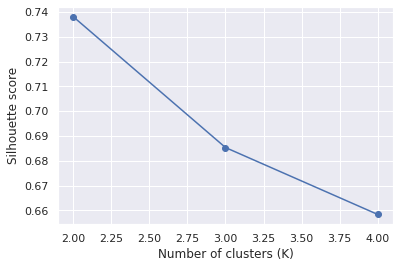

In [ ]:
plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')